In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Loading dataset

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data() #loading dataset from kera available datasets

In [3]:
len(X_train)

60000

In [4]:
#X_train contains the handwritten digits in the form of arrays(range(0,255)) which is a 28*28 matrix
#y_train contains 0 to 9

In [6]:
len(y_test)

10000

In [7]:
X_train[0].shape

(28, 28)

# Visualising the digits

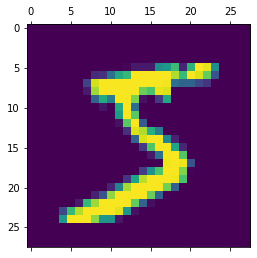

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

# Preprocessing the data

In [10]:
X_train = X_train / 255
X_test = X_test / 255
#scaling the values so as to increase accuracy

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
#flattenning the matrix from 28*28 to 784*1 
# 2-D array to 1-D coversion for faster processing
X_train_flattened = X_train.reshape(len(X_train),28*28)

In [13]:
X_train_flattened.shape

(60000, 784)

In [14]:
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [15]:
X_test_flattened.shape

(10000, 784)

# Neural Network

In [35]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
    
])

model.compile(
    optimizer = 'Adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']   
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2953 - accuracy: 0.9165
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1385 - accuracy: 0.9594
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0984 - accuracy: 0.9712
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0756 - accuracy: 0.9772
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0622 - accuracy: 0.9816


In [34]:
# sgd accuracy = 0.92
# adam accuracy = 0.9823
# rmsprop acc = 0.9789
# adamax acc = 0.9618

In [17]:
#sequential means stack of layers in neural network
# 100 is the input to the hidden layer
#dense means all the nuerons in the input layer are connected to each and every output layer neuron
#optimizers allows you to train efficiently
#why sparse categorical - because we have to identify the images according to categories 
#and those values range from 0 to 9 i.e sparse, if it was just 1 and 0 we could have used catergorical crossentropy

# Evaluating the model

In [18]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0875 - accuracy: 0.9766


[0.087526336312294, 0.9765999913215637]

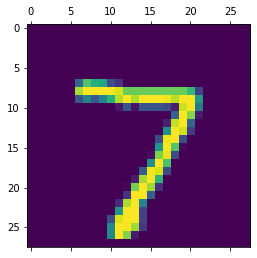

In [19]:
plt.matshow(X_test[0])

In [20]:
y_predicted = model.predict(X_test_flattened)
np.argmax(y_predicted[0]) #argmax returns the index of the max value

7

In [21]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [22]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)


Text(69.0, 0.5, 'Actual')

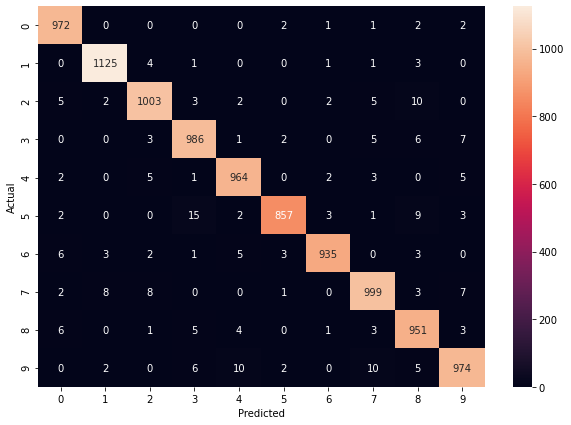

In [36]:
import seaborn as sn
from sklearn.metrics import classification_report
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [25]:
#0,0 value is 957, it tells that 957 times the model predicted it to be zero

In [38]:
print(classification_report(y_test, y_predicted_labels))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.96      0.97       892
           6       0.99      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.98      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

